In [3]:
import pandas as pd
import numpy as np
import torch
import tqdm

In [4]:
#reading all the files

#reading the first file
df = pd.read_csv('../src/outputs/run_history_19.csv', sep=';', index_col=0)
df_emb = pd.read_csv('../src/outputs/run_history_emb_idx_19.csv', sep=';', index_col=0)
np_emb_state = np.load('../src/outputs/emb_states_19.npy', allow_pickle=True)
np_emb_next_state = np.load('../src/outputs/next_states_19.npy', allow_pickle=True)

skeeped_files = []
#adding all the others
list1 = list(range(39, 5000, 20))
for i in tqdm.tqdm(list1):
    s1 = '../src/outputs/run_history_' + str(i) + '.csv'
    df_ = pd.read_csv(s1, sep=';', index_col=0)
    s2 = '../src/outputs/emb_states_' + str(i) + '.npy'
    np_emb_state_ = np.load(s2, allow_pickle=True)
    if np_emb_state_.shape[0] != df_.shape[0]:
        print ('skeeping file %d' %i)
        skeeped_files.append(s1)
        skeeped_files.append(s2)
    else:
        df = pd.concat([df,df_], axis=0)
        np_emb_state = np.concatenate((np_emb_state, np_emb_state_))
        
print(df.shape)
print(np_emb_state.shape)

 31%|███       | 76/249 [00:01<00:03, 55.08it/s]

skeeping file 1439


 82%|████████▏ | 203/249 [00:04<00:00, 48.45it/s]

skeeping file 3979


 96%|█████████▋| 240/249 [00:04<00:00, 46.06it/s]

skeeping file 4659
skeeping file 4699


100%|██████████| 249/249 [00:05<00:00, 49.74it/s]

(120311, 8)
(120311,)


In [7]:
np_emb_state[0].shape

(768,)

In [10]:
np_emb_state_float = [x.astype(np.float64) for x in np_emb_state]

In [18]:
from torch.utils.data import TensorDataset, DataLoader

tensor_emb = torch.Tensor(np.array(np_emb_state_float)) 
dataset = TensorDataset(tensor_emb) 
loader = DataLoader(dataset, batch_size = 64,
   shuffle = True)


In [26]:
for emb in loader:
    print(emb[0].size())
    break

torch.Size([64, 768])


In [30]:
class Autoenc(torch.nn.Module):
   def __init__(self):
      super().__init__()

      self.encoder = torch.nn.Sequential(
         torch.nn.Linear(768, 512),
         torch.nn.ReLU(),
         torch.nn.Linear(512, 256),
         torch.nn.ReLU(),
         torch.nn.Linear(256, 128),
         torch.nn.ReLU(),
         torch.nn.Linear(128, 64),
      )

      self.decoder = torch.nn.Sequential(
         torch.nn.Linear(64, 128),
         torch.nn.ReLU(),
         torch.nn.Linear(128, 256),
         torch.nn.ReLU(),
         torch.nn.Linear(256, 512),
         torch.nn.ReLU(),
         torch.nn.Linear(512, 768)
      )
   def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

In [31]:
model = Autoenc()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e8)

  0%|          | 0/10 [00:00<?, ?it/s]

tensor(0.1821, grad_fn=<MseLossBackward0>)
tensor(0.1791, grad_fn=<MseLossBackward0>)
tensor(0.1891, grad_fn=<MseLossBackward0>)
tensor(0.1853, grad_fn=<MseLossBackward0>)
tensor(0.1842, grad_fn=<MseLossBackward0>)
tensor(0.1850, grad_fn=<MseLossBackward0>)
tensor(0.1831, grad_fn=<MseLossBackward0>)
tensor(0.1818, grad_fn=<MseLossBackward0>)
tensor(0.1829, grad_fn=<MseLossBackward0>)
tensor(0.1792, grad_fn=<MseLossBackward0>)
tensor(0.1849, grad_fn=<MseLossBackward0>)
tensor(0.1820, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1819, grad_fn=<MseLossBackward0>)
tensor(0.1826, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1800, grad_fn=<MseLossBackward0>)


 10%|█         | 1/10 [00:11<01:40, 11.17s/it]

tensor(0.1829, grad_fn=<MseLossBackward0>)
tensor(0.1866, grad_fn=<MseLossBackward0>)
tensor(0.1856, grad_fn=<MseLossBackward0>)
tensor(0.1797, grad_fn=<MseLossBackward0>)
tensor(0.1792, grad_fn=<MseLossBackward0>)
tensor(0.1844, grad_fn=<MseLossBackward0>)
tensor(0.1855, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1848, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1838, grad_fn=<MseLossBackward0>)
tensor(0.1847, grad_fn=<MseLossBackward0>)
tensor(0.1859, grad_fn=<MseLossBackward0>)
tensor(0.1847, grad_fn=<MseLossBackward0>)
tensor(0.1828, grad_fn=<MseLossBackward0>)


 20%|██        | 2/10 [00:20<01:21, 10.21s/it]

tensor(0.1849, grad_fn=<MseLossBackward0>)
tensor(0.1815, grad_fn=<MseLossBackward0>)
tensor(0.1843, grad_fn=<MseLossBackward0>)
tensor(0.1828, grad_fn=<MseLossBackward0>)
tensor(0.1799, grad_fn=<MseLossBackward0>)
tensor(0.1840, grad_fn=<MseLossBackward0>)
tensor(0.1855, grad_fn=<MseLossBackward0>)
tensor(0.1846, grad_fn=<MseLossBackward0>)
tensor(0.1830, grad_fn=<MseLossBackward0>)
tensor(0.1852, grad_fn=<MseLossBackward0>)
tensor(0.1857, grad_fn=<MseLossBackward0>)
tensor(0.1859, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1811, grad_fn=<MseLossBackward0>)
tensor(0.1845, grad_fn=<MseLossBackward0>)
tensor(0.1798, grad_fn=<MseLossBackward0>)
tensor(0.1864, grad_fn=<MseLossBackward0>)
tensor(0.1842, grad_fn=<MseLossBackward0>)


 30%|███       | 3/10 [00:30<01:09,  9.90s/it]

tensor(0.1852, grad_fn=<MseLossBackward0>)
tensor(0.1826, grad_fn=<MseLossBackward0>)
tensor(0.1864, grad_fn=<MseLossBackward0>)
tensor(0.1891, grad_fn=<MseLossBackward0>)
tensor(0.1820, grad_fn=<MseLossBackward0>)
tensor(0.1825, grad_fn=<MseLossBackward0>)
tensor(0.1852, grad_fn=<MseLossBackward0>)
tensor(0.1842, grad_fn=<MseLossBackward0>)
tensor(0.1817, grad_fn=<MseLossBackward0>)
tensor(0.1831, grad_fn=<MseLossBackward0>)
tensor(0.1823, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1827, grad_fn=<MseLossBackward0>)
tensor(0.1859, grad_fn=<MseLossBackward0>)
tensor(0.1837, grad_fn=<MseLossBackward0>)
tensor(0.1833, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1803, grad_fn=<MseLossBackward0>)


 40%|████      | 4/10 [00:39<00:56,  9.45s/it]

tensor(0.1849, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1845, grad_fn=<MseLossBackward0>)
tensor(0.1807, grad_fn=<MseLossBackward0>)
tensor(0.1829, grad_fn=<MseLossBackward0>)
tensor(0.1826, grad_fn=<MseLossBackward0>)
tensor(0.1810, grad_fn=<MseLossBackward0>)
tensor(0.1837, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1830, grad_fn=<MseLossBackward0>)
tensor(0.1817, grad_fn=<MseLossBackward0>)
tensor(0.1853, grad_fn=<MseLossBackward0>)
tensor(0.1794, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1840, grad_fn=<MseLossBackward0>)
tensor(0.1855, grad_fn=<MseLossBackward0>)
tensor(0.1816, grad_fn=<MseLossBackward0>)
tensor(0.1850, grad_fn=<MseLossBackward0>)


 50%|█████     | 5/10 [00:47<00:45,  9.12s/it]

tensor(0.1822, grad_fn=<MseLossBackward0>)
tensor(0.1837, grad_fn=<MseLossBackward0>)
tensor(0.1848, grad_fn=<MseLossBackward0>)
tensor(0.1850, grad_fn=<MseLossBackward0>)
tensor(0.1839, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1804, grad_fn=<MseLossBackward0>)
tensor(0.1925, grad_fn=<MseLossBackward0>)
tensor(0.1852, grad_fn=<MseLossBackward0>)
tensor(0.1837, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1839, grad_fn=<MseLossBackward0>)
tensor(0.1851, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1812, grad_fn=<MseLossBackward0>)
tensor(0.1810, grad_fn=<MseLossBackward0>)
tensor(0.1827, grad_fn=<MseLossBackward0>)
tensor(0.1802, grad_fn=<MseLossBackward0>)


 60%|██████    | 6/10 [00:55<00:35,  8.89s/it]

tensor(0.1841, grad_fn=<MseLossBackward0>)
tensor(0.1854, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1857, grad_fn=<MseLossBackward0>)
tensor(0.1860, grad_fn=<MseLossBackward0>)
tensor(0.1851, grad_fn=<MseLossBackward0>)
tensor(0.1805, grad_fn=<MseLossBackward0>)
tensor(0.1868, grad_fn=<MseLossBackward0>)
tensor(0.1839, grad_fn=<MseLossBackward0>)
tensor(0.1822, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1857, grad_fn=<MseLossBackward0>)
tensor(0.1844, grad_fn=<MseLossBackward0>)
tensor(0.1825, grad_fn=<MseLossBackward0>)
tensor(0.1817, grad_fn=<MseLossBackward0>)
tensor(0.1865, grad_fn=<MseLossBackward0>)
tensor(0.1822, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)


 70%|███████   | 7/10 [01:04<00:26,  8.84s/it]

tensor(0.1821, grad_fn=<MseLossBackward0>)
tensor(0.1858, grad_fn=<MseLossBackward0>)
tensor(0.1818, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1892, grad_fn=<MseLossBackward0>)
tensor(0.1824, grad_fn=<MseLossBackward0>)
tensor(0.1833, grad_fn=<MseLossBackward0>)
tensor(0.1821, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1816, grad_fn=<MseLossBackward0>)
tensor(0.1810, grad_fn=<MseLossBackward0>)
tensor(0.1876, grad_fn=<MseLossBackward0>)
tensor(0.1830, grad_fn=<MseLossBackward0>)
tensor(0.1825, grad_fn=<MseLossBackward0>)
tensor(0.1832, grad_fn=<MseLossBackward0>)
tensor(0.1843, grad_fn=<MseLossBackward0>)
tensor(0.1823, grad_fn=<MseLossBackward0>)


 80%|████████  | 8/10 [01:13<00:17,  8.90s/it]

tensor(0.1860, grad_fn=<MseLossBackward0>)
tensor(0.1841, grad_fn=<MseLossBackward0>)
tensor(0.1820, grad_fn=<MseLossBackward0>)
tensor(0.1827, grad_fn=<MseLossBackward0>)
tensor(0.1844, grad_fn=<MseLossBackward0>)
tensor(0.1839, grad_fn=<MseLossBackward0>)
tensor(0.1822, grad_fn=<MseLossBackward0>)
tensor(0.1834, grad_fn=<MseLossBackward0>)
tensor(0.1800, grad_fn=<MseLossBackward0>)
tensor(0.1840, grad_fn=<MseLossBackward0>)
tensor(0.1856, grad_fn=<MseLossBackward0>)
tensor(0.1865, grad_fn=<MseLossBackward0>)
tensor(0.1818, grad_fn=<MseLossBackward0>)
tensor(0.1826, grad_fn=<MseLossBackward0>)
tensor(0.1844, grad_fn=<MseLossBackward0>)
tensor(0.1839, grad_fn=<MseLossBackward0>)
tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1803, grad_fn=<MseLossBackward0>)


 90%|█████████ | 9/10 [01:22<00:08,  8.86s/it]

tensor(0.1830, grad_fn=<MseLossBackward0>)
tensor(0.1838, grad_fn=<MseLossBackward0>)
tensor(0.1870, grad_fn=<MseLossBackward0>)
tensor(0.1842, grad_fn=<MseLossBackward0>)
tensor(0.1811, grad_fn=<MseLossBackward0>)
tensor(0.1858, grad_fn=<MseLossBackward0>)
tensor(0.1831, grad_fn=<MseLossBackward0>)
tensor(0.1795, grad_fn=<MseLossBackward0>)
tensor(0.1842, grad_fn=<MseLossBackward0>)
tensor(0.1851, grad_fn=<MseLossBackward0>)
tensor(0.1872, grad_fn=<MseLossBackward0>)
tensor(0.1853, grad_fn=<MseLossBackward0>)
tensor(0.1828, grad_fn=<MseLossBackward0>)
tensor(0.1853, grad_fn=<MseLossBackward0>)
tensor(0.1804, grad_fn=<MseLossBackward0>)
tensor(0.1861, grad_fn=<MseLossBackward0>)
tensor(0.1812, grad_fn=<MseLossBackward0>)
tensor(0.1852, grad_fn=<MseLossBackward0>)


100%|██████████| 10/10 [01:30<00:00,  9.10s/it]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

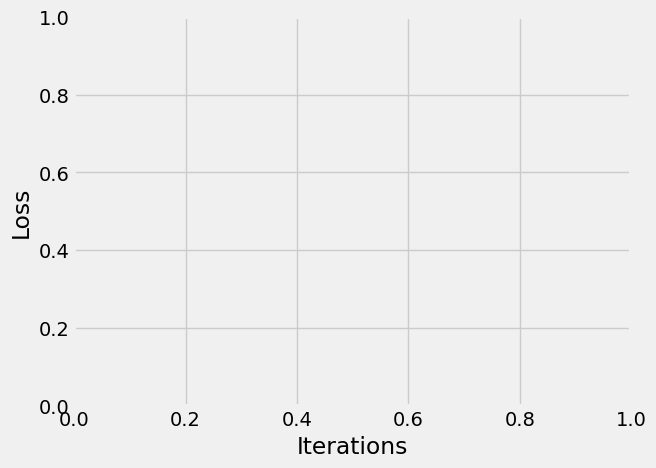

In [32]:
import matplotlib.pyplot as plt

epochs = 10
outputs = []
losses = []
list1 = list(range(epochs))

for epoch in tqdm.tqdm(list1):
   i = 0
   for emb in loader:
        i+=1
        reconstructed = model(emb[0])
        loss = loss_function(reconstructed, emb[0])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss)
        if i%100==0:
            print(loss)

        #outputs.append((epochs, emb, reconstructed))

plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[-100:])

In [ ]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[-100:])